Import Necessary Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

Input the dataset

In [ ]:
read_csv = pd.read_csv('/content/customer_data.csv')

In [ ]:
df = pd.DataFrame(read_csv)
df.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


Preprocess the data if necessary

In [ ]:
df.isnull().sum()

,0
name,0
age,0
gender,0
education,0
income,0
country,0
purchase_frequency,0
spending,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


Feature Extraction

In [ ]:
features = ['age', 'income', 'purchase_frequency', 'spending']

X = df[features].copy()

X

,age,income,purchase_frequency,spending
0,42,53936,0.9,13227.120
1,49,82468,0.6,12674.040
2,55,56941,0.3,5354.115
3,24,60651,0.2,2606.510
4,64,81884,0.9,18984.780
...,...,...,...,...
995,42,98170,0.7,17435.950
996,39,59174,0.9,11662.830
997,50,59808,0.4,7196.160
998,50,58272,0.7,13939.520


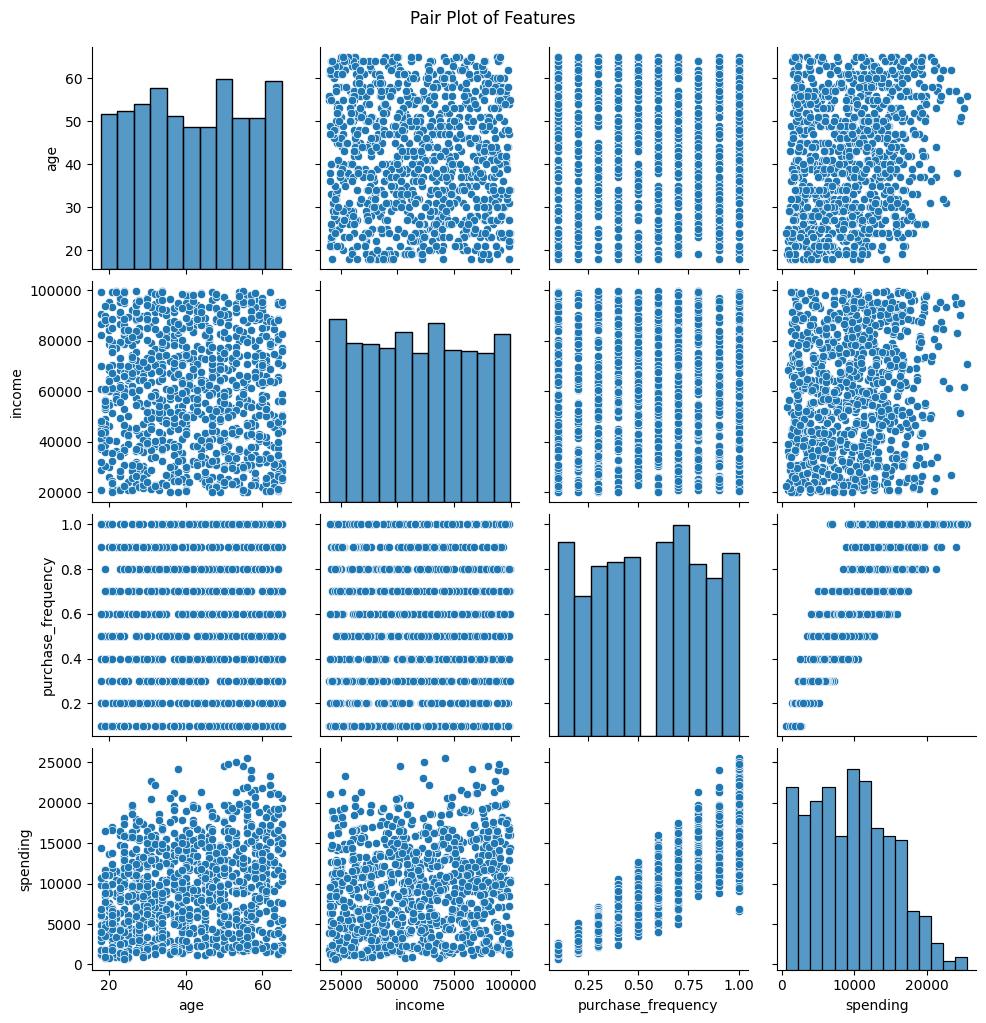

In [ ]:
sns.pairplot(df[features])

plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

Scale the dataframe using Standard Scaler method

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(1000, 4)

Feature Reduction using PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca

array([[ 1.26627264, -0.08179468],
       [ 0.7017375 ,  0.37116327],
       [-0.98496383, -0.80376327],
       ...,
       [-0.56500123, -0.43765634],
       [ 1.00875069, -0.40276021],
       [-0.46622949, -0.65958999]])

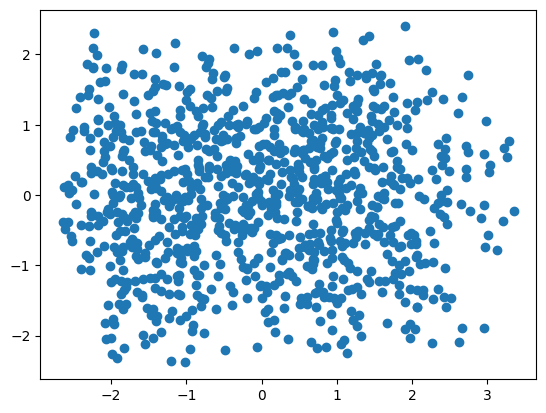

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:, 1])

Find out the optimal number of clusters using Silhouette Score

*  Higher the Silhouette Score the better

Number of Clusters: 2, Silhouette Score: 0.3012200624523584
Number of Clusters: 3, Silhouette Score: 0.240571239519557
Number of Clusters: 4, Silhouette Score: 0.1963007473391952
Number of Clusters: 5, Silhouette Score: 0.17166076882619374
Number of Clusters: 6, Silhouette Score: 0.16965748941001005


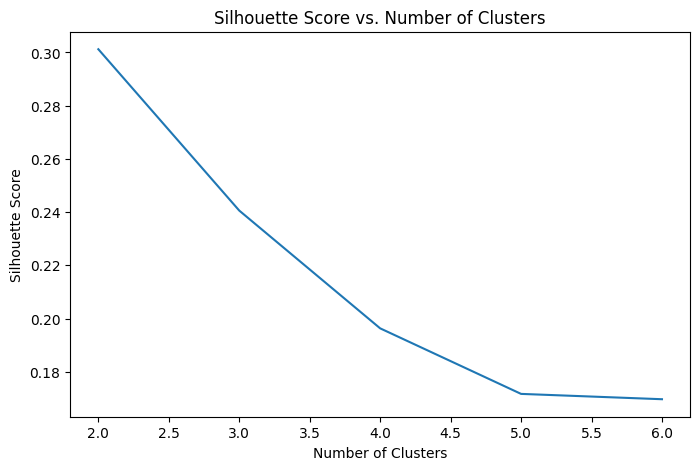

In [ ]:
cluster_range = range(2, 7)
silhouette_scores = []

# Iterate over the range and calculate the Silhouette Score for each cluster count
for n_clusters in cluster_range:
    # Fit the Agglomerative Clustering model
    cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = cluster.fit_predict(X_pca)

    # Calculate the Silhouette Score
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {score}")

# Plot the Silhouette Scores for each cluster count
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores)
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


Plot the Dendrogram

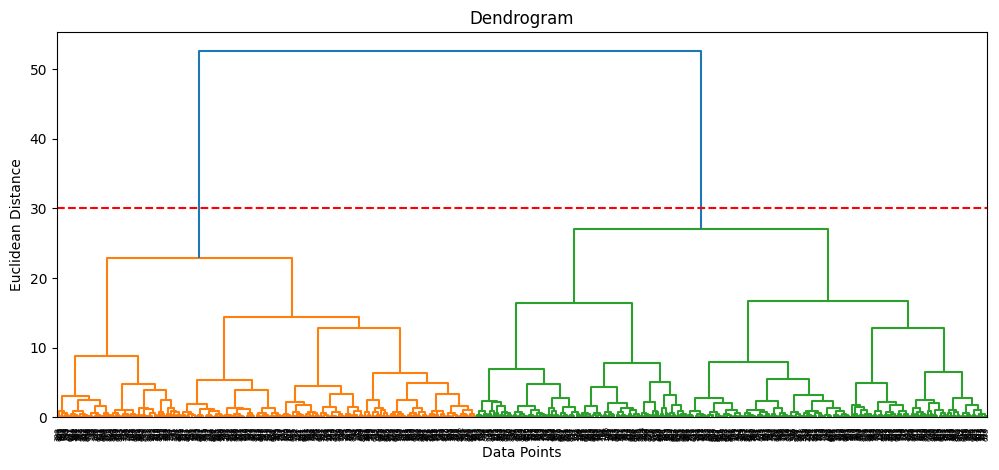

In [ ]:
plt.figure(figsize = (12,5))
plt.title('Dendrogram')

sch.dendrogram(sch.linkage(X_pca, method='ward'))

plt.axhline(y=30, color='r', linestyle='--', label='Threshold at y=30')

plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

Use Heirarchical Clustering technique (Agglomerative Clustering)

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(X_pca)

AgglomerativeClustering()

In [ ]:
cluster.labels_

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,

Plotting clusters based on their PCA values

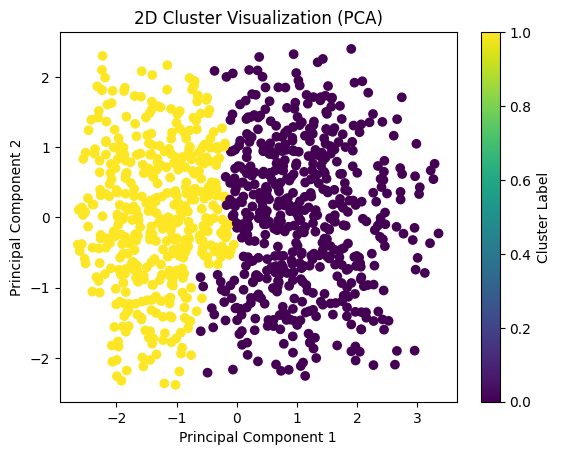

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:, 1], c=cluster.labels_)
plt.title("2D Cluster Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

Customer Statistics

In [ ]:
cluster_stats = X.groupby(cluster.labels_).agg({
    'age': ['mean', 'median', 'std'],
    'income': ['mean', 'median', 'std'],
    'purchase_frequency': ['mean', 'median', 'std'],
    'spending': ['mean', 'median', 'std']
})

cluster_stats

age                          income                         \
        mean median        std          mean   median           std   
0  44.413479   46.0  13.182682  61310.979964  61890.0  23759.646597   
1  38.516630   37.0  13.809548  56802.935698  55975.0  22411.402409   

  purchase_frequency                       spending                          
                mean median       std          mean     median          std  
0           0.764845    0.8  0.169000  13672.620811  13049.505  3690.629080  
1           0.298670    0.3  0.159856   4671.902461   4606.790  2370.674235

Plotting clusters based on their t-SNE values for better visualization of clusters

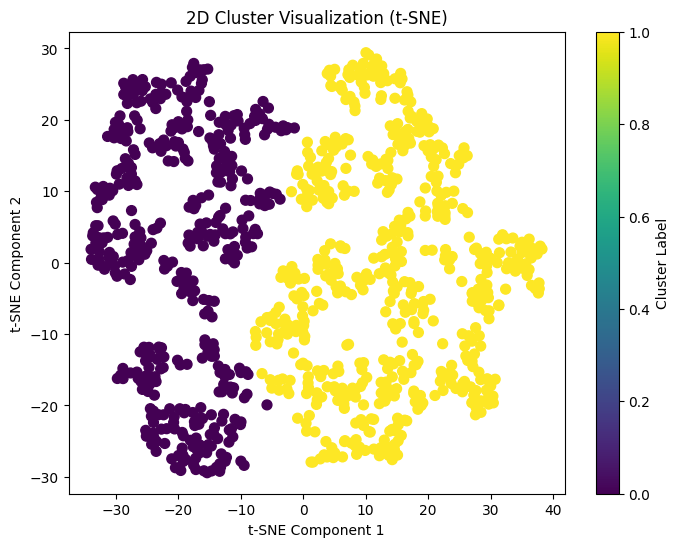

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

#Fit Agglomerative Clustering with the chosen number of clusters - 2
cluster2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
tsne_labels = cluster2.fit_predict(X_tsne)

#Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=tsne_labels, marker='o', s=50)
plt.title("2D Cluster Visualization (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Cluster Label')
plt.show()
